---
# Módulo 4 - Estatística para MF
---

In [94]:
import numpy as np
import pandas as pd

import pylab
import statsmodels.api  as sm 
from sklearn import linear_model
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import yfinance as yf
import vectorbt as vbt

import seaborn as sns 
import plotly.graph_objects as go
import plotly_express as px
import sweetviz as sv
from plotly.subplots import make_subplots

## 1. Distribuição dos dados

Distribuição dos dados é o ponto chave para praticamente tudo o que entendemos por estatística

Apesar disso, muitas vezes é simplesmente ignorada nos modelos. Muitas vezes, modelos podem \
não funcionar por causa de algumas poucas observações que distorcem a distribuição dos dados.

### 1.1. Distribuição Normal

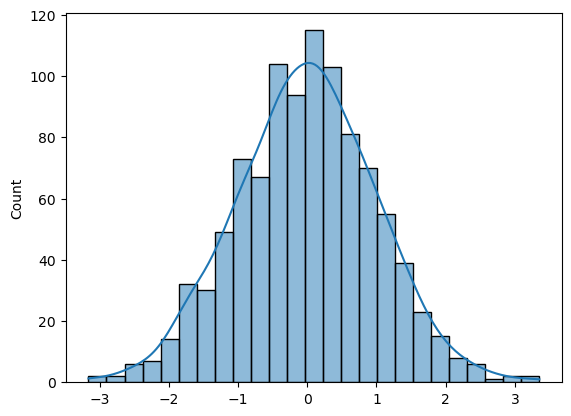

In [95]:
normal_dist = np.random.normal(0,1,1000)
normal_fig1 = sns.histplot(normal_dist, kde=True)

In [96]:
print(np.mean(normal_dist))
print(np.median(normal_dist))
print(stats.mode(normal_dist))

-0.014013764396750929
0.0038472212255608175
ModeResult(mode=-3.159739183693824, count=1)


In [97]:
fig01 = px.histogram(normal_dist, color_discrete_sequence=['lightseagreen'])
fig01.add_vline(x=np.mean(normal_dist), line_width=3,  line_color="red")
fig01.add_vline(x=np.median(normal_dist), line_width=3, line_dash="dash", line_color="red")
fig01.update_layout(width=600, height=600, template = 'simple_white',
                    paper_bgcolor="#f7f8fa", margin=dict(l=20, r=20, t=20, b=20),
                    showlegend=False)

#### Testes de Normalidade

- À medida que aumenta o uso de grandes volumes de dados, os testes de normalidade vão caindo em desuso, pois eles são sensíveis justamente à quantidade de dados.


In [98]:
stats.normaltest(normal_dist)

## pvalue > 0.05 --> normal

NormaltestResult(statistic=0.3087351771695038, pvalue=0.8569569555132943)

#### Medidas de posição: quantis

Quantis são pontos de corte que dividem um intervalo de distribuição de probabilidade em intervalos contínuos com probabilidades iguais, ou as observações de uma amostra do mesmo jeito.

<img src="https://cdn.scribbr.com/wp-content/uploads/2022/05/Quartiles-probability-distribution.webp" width="800" align="left"/>

#### Quantile - Quantile PLot (Q-Q Plot)

Compara os quanits do modelo real (imperfeito) com um modelo teórico (perfeitamente normal)

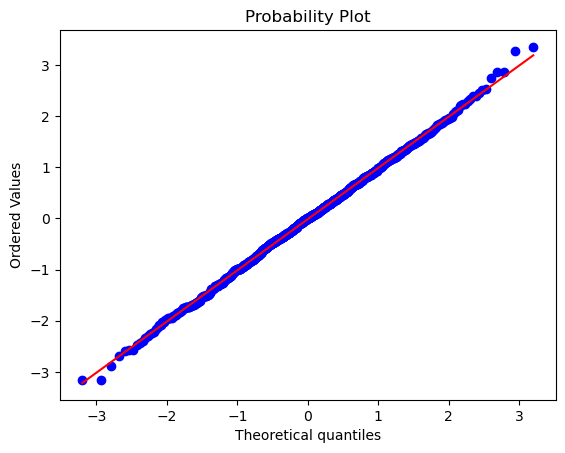

In [99]:
stats.probplot(normal_dist, dist='norm', plot=pylab)
pylab.show()

In [100]:
fig02 = go.Figure()
fig02.add_trace(go.Box(y=normal_dist, boxpoints='all', boxmean='sd', name='<b>Normal distribution', marker_color = 'blue'))
fig02.update_layout(width=450, height=600, template = 'simple_white',
                    paper_bgcolor="#f7f8fa", margin=dict(l=20, r=20, t=20, b=20),
                    showlegend=False)

print(np.quantile(normal_dist, 0.25))
print(np.percentile(normal_dist, 25))
fig02.show()

-0.6761996209229395
-0.6761996209229395


In [101]:
pd.DataFrame(normal_dist).describe()

,0
count,1000.000000
mean,-0.014014
std,0.999457
min,-3.159739
25%,-0.676200
50%,0.003847
75%,0.663103
max,3.352660


#### Skewness


<img src="https://www.biologyforlife.com/uploads/2/2/3/9/22392738/c101b0da6ea1a0dab31f80d9963b0368_orig.png" width="800" align="left"/>

In [102]:
stats.skew(normal_dist)

-0.0034569146830208584

#### Medidas de dispersão

> Amplitude, desvio-padrão e médio, coef de variação e int de confiança 

In [109]:
#Desvio Padrão
# Sharpe ratio, bandas de bollinger

np.std(normal_dist, ddof=True)

0.9994565402832523

In [108]:
#Coef de Variação
#Comparar e avaliar a consistência (ex, pagamento de dividendos)

np.std(normal_dist, ddof=True)/np.mean(normal_dist)*100

-7131.963346800484

In [105]:
#Erro padrão da Média

stats.stats.sem(normal_dist)

C:\Users\Murilo.DESKTOP-P93B3O6\AppData\Local\Temp\ipykernel_22652\1867886439.py:3: DeprecationWarning:

Please import `sem` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.



0.03160559089646907

In [112]:
# Intervalo de Confiança

ic_95 = stats.t.interval(confidence=0.95, df = len(normal_dist)-1, loc = np.mean(normal_dist), scale = stats.sem(normal_dist))
ic_95

(-0.07603472581651406, 0.048007197023012205)

#### Curtose

<img src="https://www.researchgate.net/profile/Attila-Bonyar/publication/298415862/figure/fig1/AS:340236723867648@1458130164255/Illustration-of-the-skewness-and-kurtosis-values-and-how-they-correlate-with-the-shape-of_W640.jpg" width="600" align="left"/>

In [113]:
stats.kurtosis(normal_dist, fisher=True)

0.06972143295798139